In [1]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [9]:
x = df.drop(["Weight"],axis=1)
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [10]:
x.shape

(8555, 2)

In [11]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [12]:
y.shape

(8555,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.30, random_state=42)

In [15]:
print(xTrain.shape,yTrain.shape)

(5988, 2) (5988,)


# EDA

In [16]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,0.682524,0.790208
Height,0.682524,1.000000,0.922975
Weight,0.790208,0.922975,1.000000


# Least Squared Linear Regression

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [59]:
reg_model = LinearRegression().fit(xTrain,yTrain)

In [60]:
reg_model.coef_

array([19.54151693,  5.9562333 ])

In [61]:
reg_model.intercept_

np.float64(-243.79306041624142)

In [62]:
reg_training_a = reg_model.score(xTrain,yTrain)*100
reg_test_a = reg_model.score(xTest,yTest)*100
print(f"LinearRegression: Training accuracy is = {reg_training_a} and test accuracy is = {reg_test_a}")

LinearRegression: Training accuracy is = 89.73793060969246 and test accuracy is = 90.59112424422659


In [63]:
yPred = reg_model.predict(xTest)
yPred.shape

(2567,)

In [64]:
yTest.shape

(2567,)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
reg_mse = mean_squared_error(yTest,yPred)
reg_mse

96.8373443783061

In [67]:
reg_x = np.array(['Training Accuracy', 'Test Accuracy', 'MSE'])
reg_y = np.array([reg_training_a,reg_test_a,reg_mse])

In [68]:
type(reg_x)

numpy.ndarray

In [69]:
import matplotlib.pyplot as plt

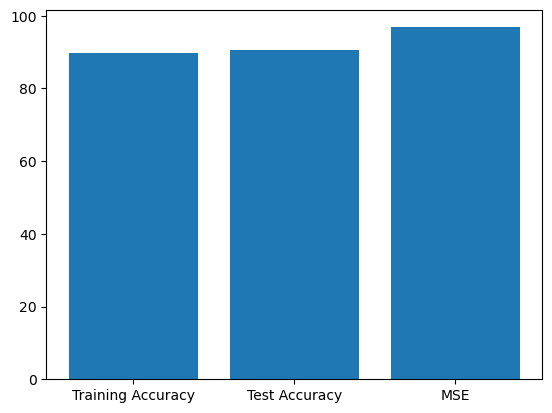

In [70]:
plt.bar(reg_x,reg_y)
plt.show()

# KNN Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn_reg_model = KNeighborsRegressor().fit(xTrain,yTrain)

In [74]:
knn_reg_train_a = knn_reg_model.score(xTrain,yTrain)*100
knn_reg_test_a = knn_reg_model.score(xTest,yTest)*100
print(f"KNeighborsRegressor: Training accuracy is = {knn_reg_train_a} and test accuracy is = {knn_reg_test_a}")

KNeighborsRegressor: Training accuracy is = 91.72142723737919 and test accuracy is = 88.21086423439016


In [75]:
knn_yPred = knn_reg_model.predict(xTest)
knn_yPred.shape

(2567,)

In [76]:
knn_reg_mse = mean_squared_error(yTest,knn_yPred)
knn_reg_mse

121.33528273624482

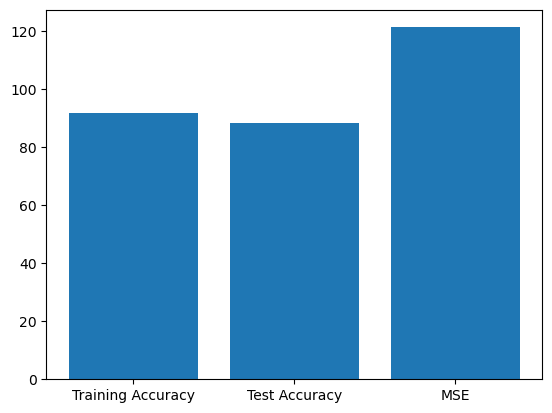

In [77]:
knn_reg_x = np.array(['Training Accuracy', 'Test Accuracy', 'MSE'])
knn_reg_y = np.array([knn_reg_train_a,knn_reg_test_a,knn_reg_mse])
plt.bar(knn_reg_x,knn_reg_y)
plt.show()

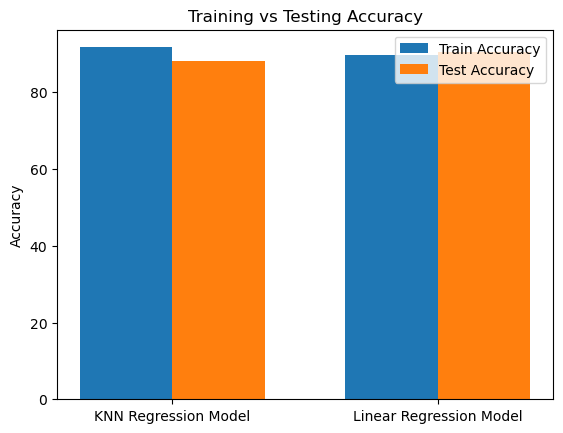

In [106]:
kr_x = np.array(['KNN Regression Model', 'Linear Regression Model'])
kr_train_scores = np.array([knn_reg_train_a, reg_training_a])
kr_test_scores  = np.array([knn_reg_test_a, reg_test_a])
kr_x_po = np.arange(len(kr_x))
width = 0.35
# Plot
plt.bar(kr_x_po - width/2, kr_train_scores, width, label='Train Accuracy')
plt.bar(kr_x_po + width/2, kr_test_scores, width, label='Test Accuracy')
plt.xticks(kr_x_po, kr_x)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()

# Regression Problem

# Classification Problem

## Logistic Regression

In [107]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [108]:
xx = df.drop(['Gender'],axis=1)
xx.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [109]:
xx.shape

(8555, 2)

In [110]:
yy = df['Gender']

In [111]:
yy.shape

(8555,)

In [112]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size = 0.30, random_state=42)

In [113]:
x_train.shape

(5988, 2)

In [114]:
y_train.shape

(5988,)

In [115]:
y_test.head()

6006    0
1197    1
2862    1
6497    0
2860    1
Name: Gender, dtype: int64

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lo_reg_model = LogisticRegression(random_state=0).fit(x_train,y_train)

In [118]:
lo_reg_train_a = lo_reg_model.score(x_train,y_train)*100
lo_reg_test_a = lo_reg_model.score(x_test,y_test)*100
print(f"LogisticRegression: training accuracy is {lo_reg_train_a} and test accuracy is {lo_reg_test_a}")

LogisticRegression: training accuracy is 91.73346693386773 and test accuracy is 91.85820023373587


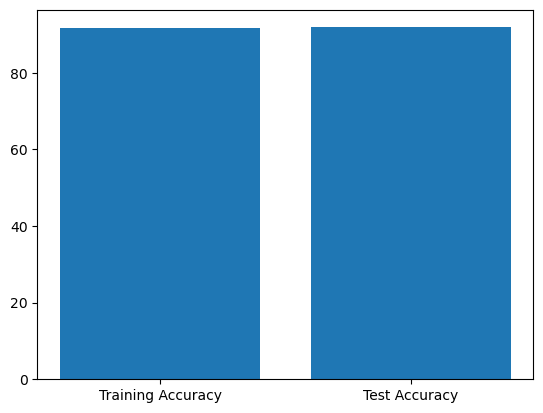

In [119]:
lo_reg_x = np.array(['Training Accuracy', 'Test Accuracy'])
lo_reg_y = np.array([lo_reg_train_a,lo_reg_test_a])
plt.bar(lo_reg_x,lo_reg_y)
plt.show()

## KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn_cls_model = KNeighborsClassifier().fit(x_train,y_train)

In [122]:
knn_cls_train_a = knn_cls_model.score(x_train,y_train)*100
knn_cls_test_a = knn_cls_model.score(x_test,y_test)*100
print(f"KNeighborsClassifier: training accuracy is {knn_cls_train_a} and test accuracy is {knn_cls_test_a}")

KNeighborsClassifier: training accuracy is 92.9191716766867 and test accuracy is 91.31281651733542


# Comparison of Linear Rgeression and KNN Regressor

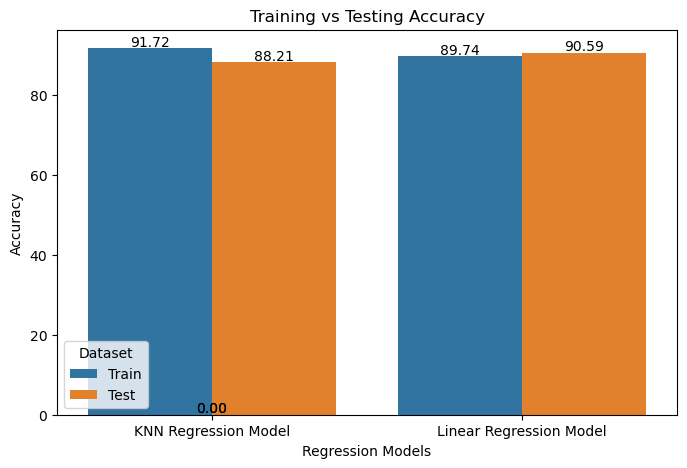

In [135]:
import seaborn as sns

# Data
kr_x = ['KNN Regression Model', 'Linear Regression Model']
kr_train_scores = [knn_reg_train_a, reg_training_a]
kr_test_scores  = [knn_reg_test_a, reg_test_a]

# Convert into tidy DataFrame
df = pd.DataFrame({
    'Model': kr_x * 2,
    'Accuracy': kr_train_scores + kr_test_scores,
    'Dataset': ['Train'] * len(kr_x) + ['Test'] * len(kr_x)
})

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df)

# Add value labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.5,    # little above bar
            f'{p.get_height():.2f}', # show with 2 decimals
            ha='center')

plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Regression Models')
plt.show()


# Comparison of Logistic Rgeression and KNN Classifier

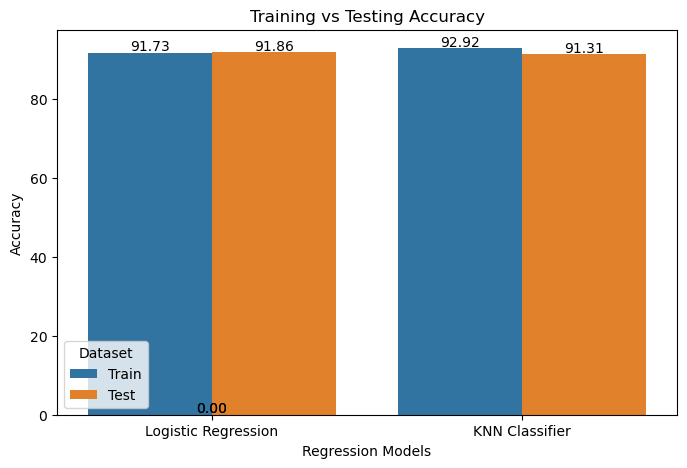

In [136]:
#plot
kr_x = ['Logistic Regression', 'KNN Classifier']
kr_train_scores = [lo_reg_train_a, knn_cls_train_a]
kr_test_scores  = [lo_reg_test_a, knn_cls_test_a]

# Convert into tidy DataFrame
df = pd.DataFrame({
    'Model': kr_x * 2,
    'Accuracy': kr_train_scores + kr_test_scores,
    'Dataset': ['Train'] * len(kr_x) + ['Test'] * len(kr_x)
})

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df)

# Add value labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.5,    # little above bar
            f'{p.get_height():.2f}', # show with 2 decimals
            ha='center')

plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Regression Models')
plt.show()